In [5]:
#!usr/bin/python3 

import pandas as pd
import json
import matplotlib.pyplot as plt
from iso639 import languages
from textblob import TextBlob
import re
from wordcloud import WordCloud, STOPWORDS

In [6]:
tweets_data_path = 'New-tweet_extract.txt'

tweets_data = []
tweets_file = open(tweets_data_path, "r")
for line in tweets_file:
    try:
        tweet = json.loads(line)
        tweets_data.append(tweet)
    except:
        continue

print ("Total Data Samples Present -", len(tweets_data))

Total Data Samples Present - 10000


In [7]:
tweets = pd.DataFrame(tweets_data, columns=["text","lang","country", "user"])
tweets.head()

,text,lang,country,user
0,"RT @FrustIndian: Day 1: I will take Modi down,...",en,NaN,{'profile_image_url': 'http://pbs.twimg.com/pr...
1,"RT @Pawankhera: For the people of India, every...",en,NaN,{'profile_image_url': 'http://pbs.twimg.com/pr...
2,RT @alok_bhatt: What will Modi do in this chao...,en,NaN,{'profile_image_url': 'http://pbs.twimg.com/pr...
3,RT @j_kalyanaraman: All these crooks and scams...,en,NaN,{'profile_image_url': 'http://pbs.twimg.com/pr...
4,RT @rangakidambee: I applaud @MALAVIKAAVINASH ...,en,NaN,{'profile_image_url': 'http://pbs.twimg.com/pr...


In [25]:
def get_phrase_sentiment(phrase):
    pattern2 = "(^RT @\w+.)"
    d = re.findall(pattern2,phrase)
    for i in d:
        phrase.replace(i,"")
    temp = ""
    for letter in phrase:
        if letter.isalnum() or " ":
            temp+= letter
    phrase = temp
    
    analysis = TextBlob(phrase)
    if analysis.sentiment.polarity > 0:
        return 'positive', float(format(analysis.sentiment.polarity, '.3f'))
    elif analysis.sentiment.polarity == 0:
        return 'neutral', float(format(analysis.sentiment.polarity, '.3f'))
    else:
        return 'negative', float(format(analysis.sentiment.polarity, '.3f'))
    
tweets["tweet_sentiment"] = tweets.text.apply(get_phrase_sentiment)
tweets["sentiment_type"] = tweets.tweet_sentiment.apply(lambda i:i[0])
tweets["sentiment_value"] = tweets.tweet_sentiment.apply(lambda i:i[1])
tweets = tweets.drop(['tweet_sentiment'],axis=1)
tweets.head()

,text,lang,country,user,sentiment_type,sentiment_value
0,"RT @FrustIndian: Day 1: I will take Modi down,...",en,NaN,{'profile_image_url': 'http://pbs.twimg.com/pr...,negative,-0.156
1,"RT @Pawankhera: For the people of India, every...",en,NaN,{'profile_image_url': 'http://pbs.twimg.com/pr...,positive,0.032
2,RT @alok_bhatt: What will Modi do in this chao...,en,NaN,{'profile_image_url': 'http://pbs.twimg.com/pr...,negative,-0.200
3,RT @j_kalyanaraman: All these crooks and scams...,en,NaN,{'profile_image_url': 'http://pbs.twimg.com/pr...,neutral,0.000
4,RT @rangakidambee: I applaud @MALAVIKAAVINASH ...,en,NaN,{'profile_image_url': 'http://pbs.twimg.com/pr...,positive,0.250


neutral     5536
positive    2385
negative    2079
Name: sentiment_type, dtype: int64


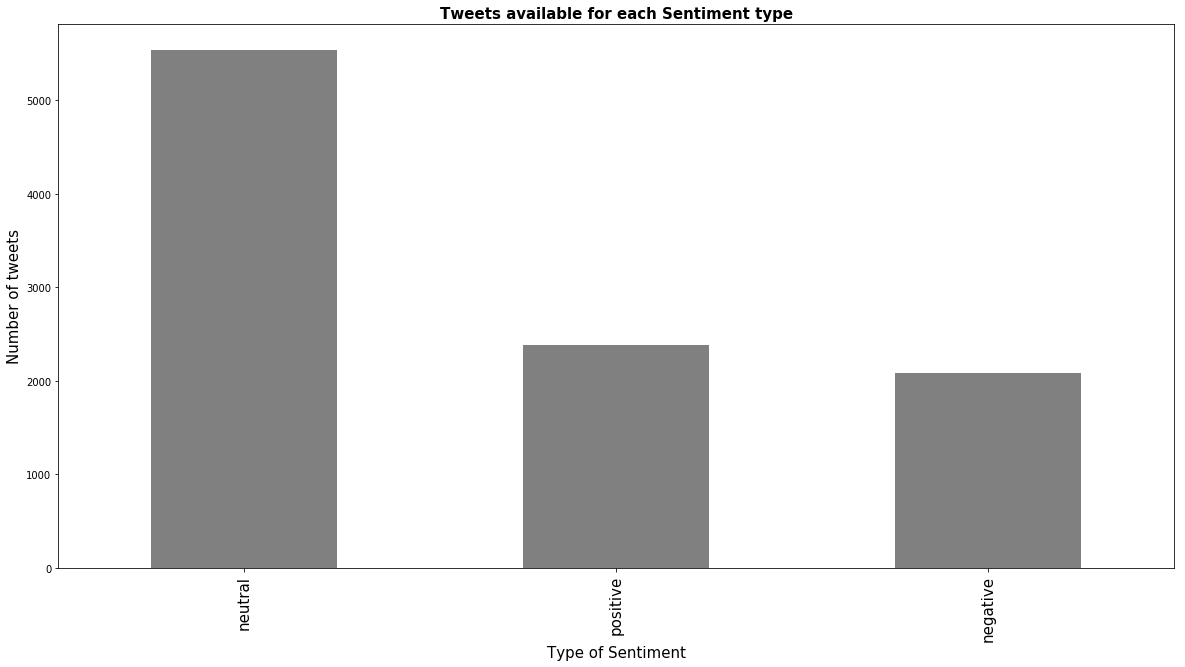

In [26]:
senti_types = tweets['sentiment_type'].value_counts()
ig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Type of Sentiment', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Tweets available for each Sentiment type', fontsize=15, fontweight='bold')
senti_types.plot(ax=ax, kind='bar', color='grey', figsize=(20,10))
print(senti_types)
plt.show()

In [27]:
df_negative = tweets
df_negative["sentiment_value"] = df_negative.sentiment_value.apply(lambda i:float(i))
negative_tweets = df_negative[df_negative["sentiment_value"]<0]
negative_tweets .head()

,text,lang,country,user,sentiment_type,sentiment_value
0,"RT @FrustIndian: Day 1: I will take Modi down,...",en,NaN,{'profile_image_url': 'http://pbs.twimg.com/pr...,negative,-0.156
2,RT @alok_bhatt: What will Modi do in this chao...,en,NaN,{'profile_image_url': 'http://pbs.twimg.com/pr...,negative,-0.200
8,RT @NaIna0806: Shocking video footage of viole...,en,NaN,{'profile_image_url': 'http://pbs.twimg.com/pr...,negative,-0.333
16,RT @RahulGandhi: The UPA negotiates the RAFALE...,en,NaN,{'profile_image_url': 'http://pbs.twimg.com/pr...,negative,-0.156
18,RT @ashoswai: Why has Modi put IAS Officer Pra...,en,NaN,{'profile_image_url': 'http://pbs.twimg.com/pr...,negative,-0.400


INDIA                   653
Location Unavailable    644
DELHI                    65
MUMBAI                   48
BANGALORE                38
भारत                     37
BENGALURU                14
MAHARASHTRA              13
CHENNAI                  13
HYDERABAD                13
Name: location, dtype: int64


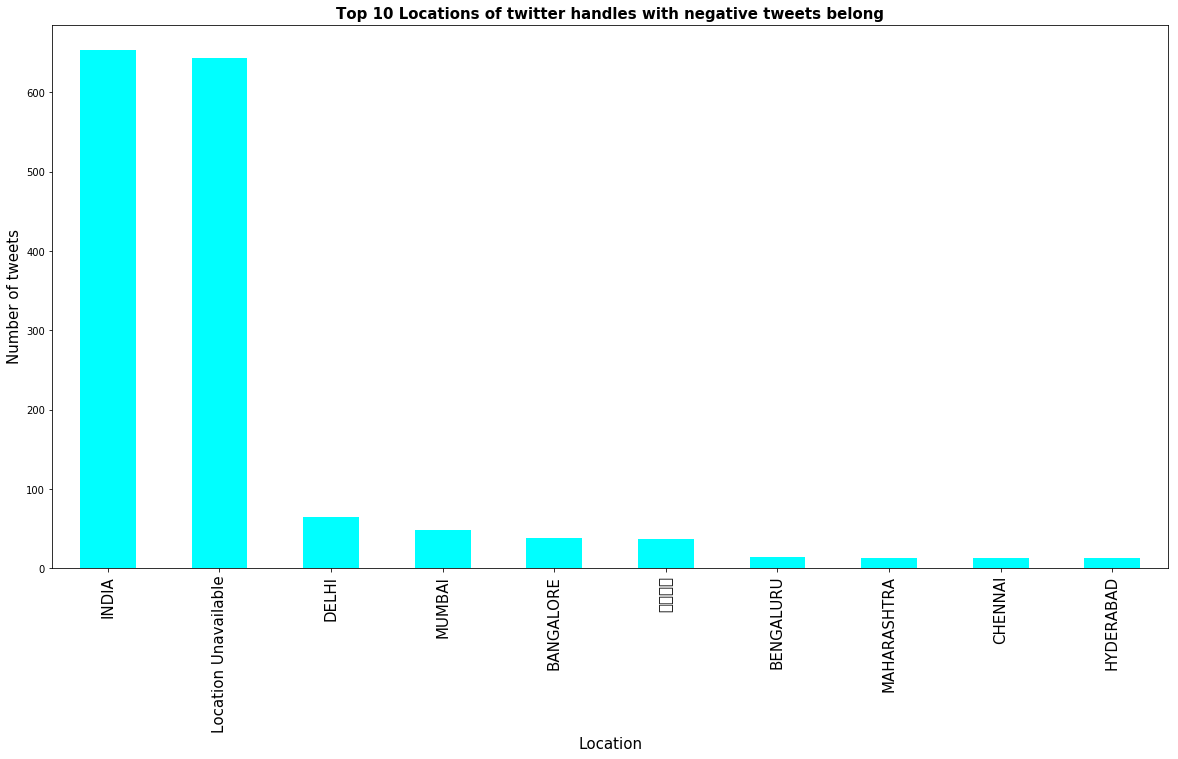

In [28]:
def handle_location_used(string):
    try:
        string = str(string)
        res = eval(string)["location"]
        return str(res.split()[-1]).upper()
    except:
        return "Location Unavailable"
    
handles_by_location = pd.DataFrame()
handles_by_location["location"] = negative_tweets.user.apply(handle_location_used)
t_b_l_5 = handles_by_location["location"].value_counts()[:10]
fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Location', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top 10 Locations of twitter handles with negative tweets belong', fontsize=15, fontweight='bold')
t_b_l_5.plot(ax=ax, kind='bar', color='cyan', figsize=(20,10))
print(t_b_l_5[:10])
plt.show()

No Profile Image Available                                                     189
http://pbs.twimg.com/profile_images/378800000866615501/pByLkqum_normal.jpeg     12
http://pbs.twimg.com/profile_images/945625468161572864/94Lz9AJc_normal.jpg      10
http://pbs.twimg.com/profile_images/897856794751451136/fIQftXs9_normal.jpg       7
http://pbs.twimg.com/profile_images/673983608630067200/3BiVuGhS_normal.jpg       6
http://pbs.twimg.com/profile_images/975607728025448450/wZwpC9pF_normal.jpg       6
http://pbs.twimg.com/profile_images/672370402560053248/EcGUmaBW_normal.jpg       6
http://pbs.twimg.com/profile_images/937593514694758400/BOzzTeEc_normal.jpg       5
http://pbs.twimg.com/profile_images/541179581877583872/UcPAy5_u_normal.jpeg      5
http://pbs.twimg.com/profile_images/971357627283251202/cqMvt6lv_normal.jpg       5
Name: image_availability, dtype: int64


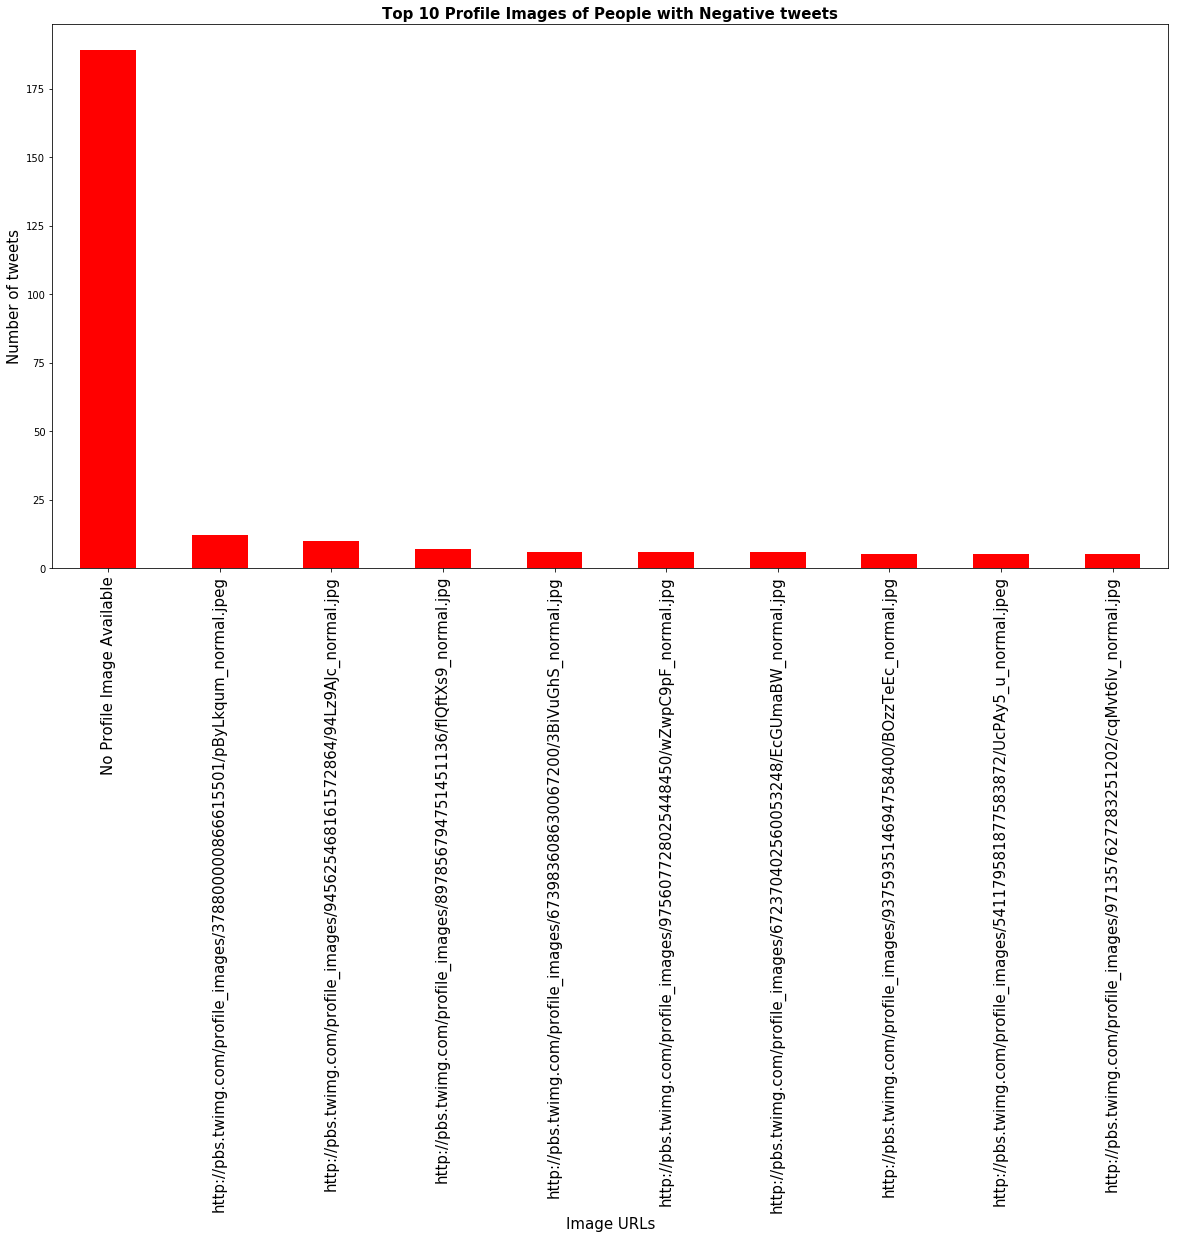

In [30]:
def handle_has_image(string):
    try:
        string=str(string)
        res = eval(string)["profile_image_url"]
        if "default_profile_normal.png" not in res:
            
            return res
        else:
            return "No Profile Image Available"
    except:
        return "No Profile Image Available"
    
handles_image_availability = pd.DataFrame()
handles_image_availability["image_availability"] = negative_tweets.user.apply(handle_has_image)
t_b_l_5 = handles_image_availability["image_availability"].value_counts()[:10]
fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Image URLs', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top 10 Profile Images of People with Negative tweets', fontsize=15, fontweight='bold')
t_b_l_5.plot(ax=ax, kind='bar', color='red', figsize=(20,10))
print(t_b_l_5[:10])
plt.show()

@DrRBSingh         12
@rekharammali      12
@ScamBusterIN      10
@MikeDesai          7
@BaadshahSufyan     6
@PDrsudhakar        6
@avinash_mailme     6
@mankalitta         5
@PainoliD           5
@kurup62            5
Name: screen_name, dtype: int64


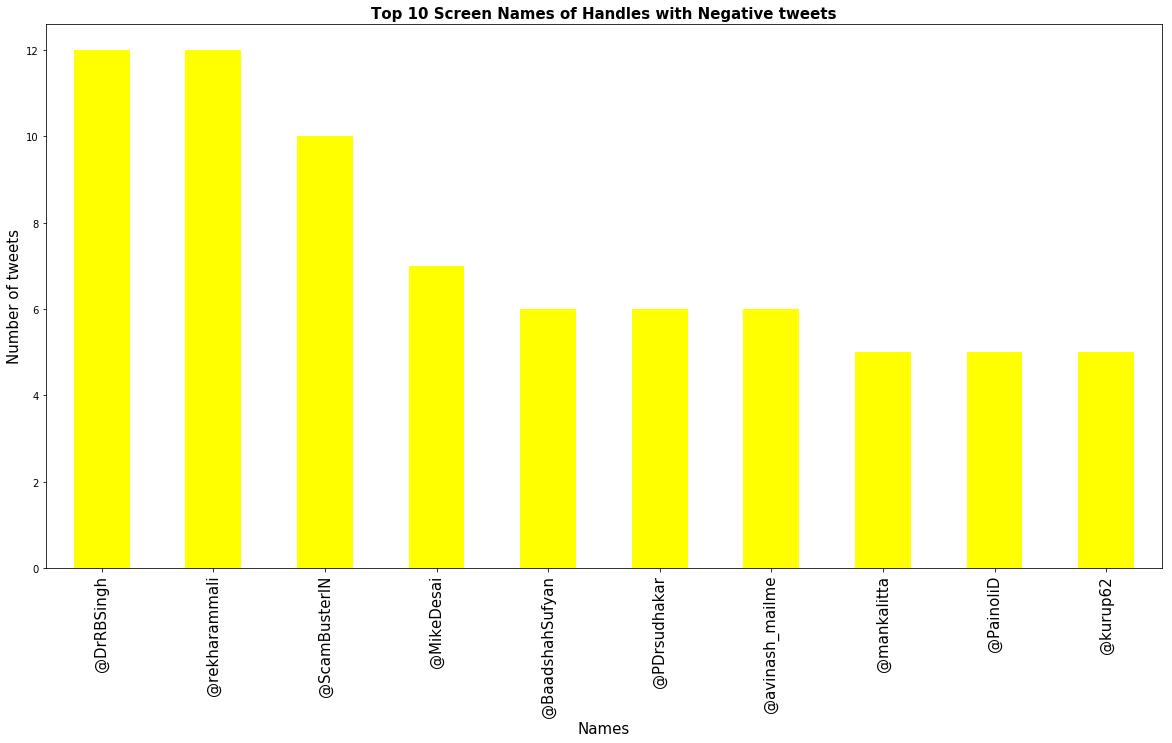

In [31]:
def handle_name(string):
    try:
        string = str(string)
        res = eval(string)["screen_name"]
        return "@"+res
    except:
        return None
    
handles_names = pd.DataFrame()
handles_names["screen_name"] = negative_tweets.user.apply(handle_name)
t_b_l_5 = handles_names["screen_name"].value_counts()[:10]
fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Names', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top 10 Screen Names of Handles with Negative tweets', fontsize=15, fontweight='bold')
t_b_l_5.plot(ax=ax, kind='bar', color='yellow', figsize=(20,10))
print(t_b_l_5[:10])
plt.show()

2017    302
2010    236
2009    227
2016    210
2014    202
2011    193
2013    190
2018    181
2015    180
2012    136
Name: year, dtype: int64


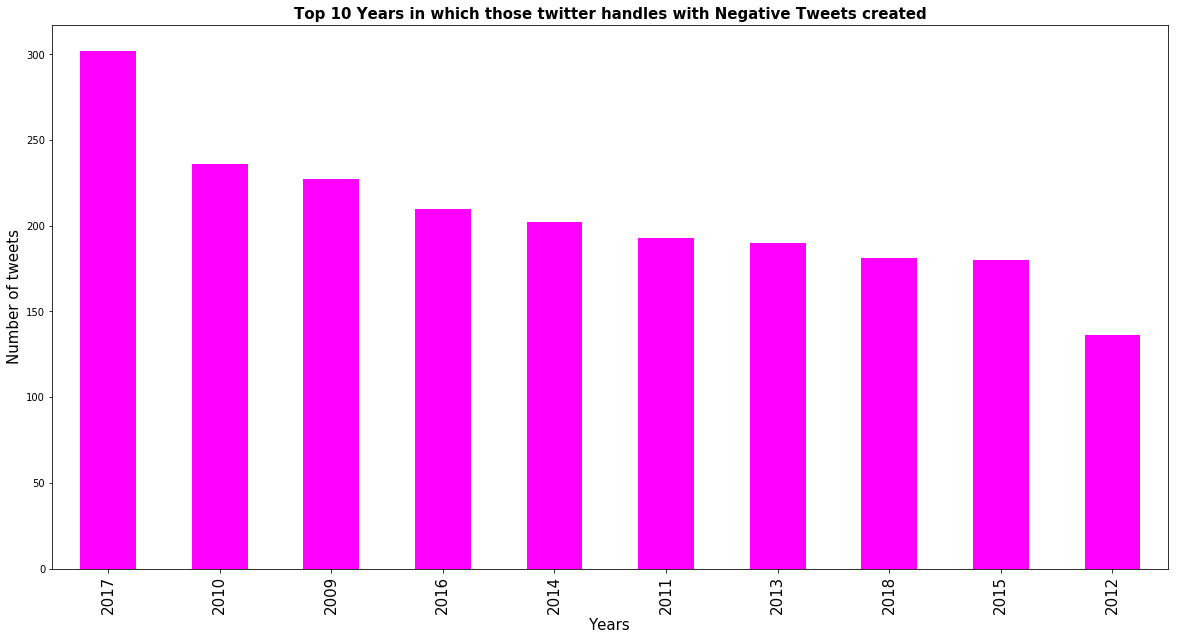

In [32]:
def handle_created_year(string):
    string = str(string)
    try:
        res = eval(string)["created_at"]
        return str(res.split()[-1])
    except:
        return "Year Unavailable"
    
handles_by_year = pd.DataFrame()
handles_by_year["year"] = negative_tweets.user.apply(handle_created_year)
t_b_l_5 = handles_by_year["year"].value_counts()[:10]
fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Years', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top 10 Years in which those twitter handles with Negative Tweets created', fontsize=15, fontweight='bold')
t_b_l_5.plot(ax=ax, kind='bar', color='magenta', figsize=(20,10))
print(t_b_l_5[:10])
plt.show()

In [40]:
def find_negative_hash_words(string):
    pattern = r"#\w+"
    d = re.findall(pattern,string)
    if d == []:
        return None
    else:
        d = [i.lower() for i in d]
        return d
    
negative_hash_words = pd.DataFrame()
negative_hash_words["negative_words"] = negative_tweets.text.apply(find_negative_hash_words)
list_negative_words = negative_hash_words["negative_words"].tolist()
list_negative_words = [k for l in [j for j in list_negative_words if j!= None] for k in l]
negative_words_100 = pd.Series(list_negative_words).value_counts()[:100]
negative_words_100_list = negative_words_100.index.values
print('Top 10 Negative Hashes in the samples are - ', negative_words_100_list[:10])

Top 10 Negative Hashes in the samples are -  ['#cbsepaperleak' '#bharatbandh' '#sabkasathsabkavikas'
 '#mahadoctorshungerstrike' '#modi' '#cauveryissue' '#happyjumladivas'
 '#nsui' '#dalit' '#gst']


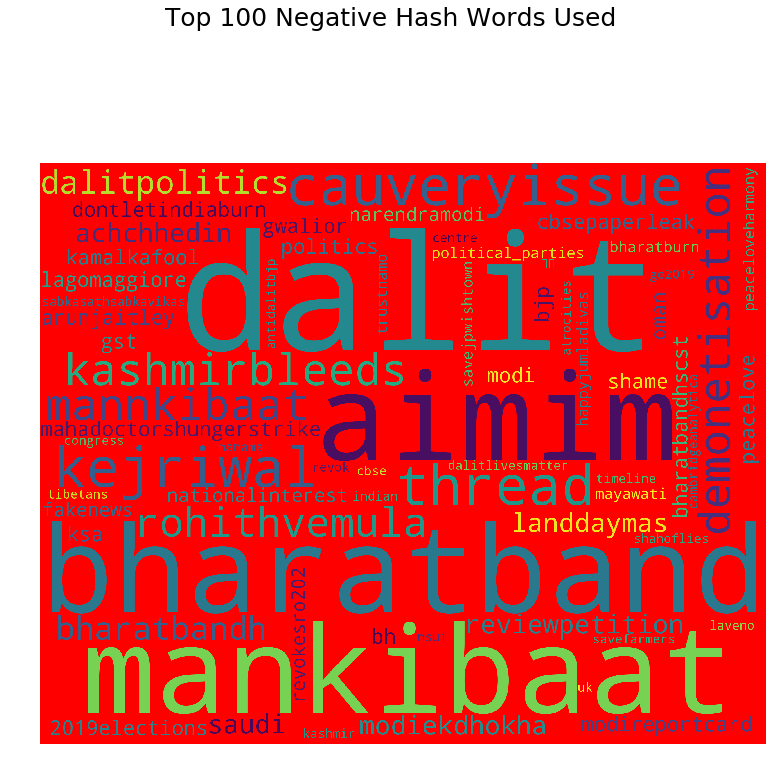

In [41]:
def wordcloud_figure(data, color = 'black'):
    cleaned_word = [word.replace(":","") for word in data]
    cleaned_word = [word.replace("?","") for word in data]
    cleaned_word = [word.replace(";","") for word in data]
    cleaned_word = [word.replace(",","") for word in data]
    #cleaned_word = [word.replace("#","") for word in data]
    new_data = " ".join(cleaned_word)
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(new_data)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    if color=="white":
        plt.suptitle("Top 100 Positive Hash Words Used", fontsize=25)
    if color=="red":
        plt.suptitle("Top 100 Negative Hash Words Used", fontsize=25)
    if color not in ["red","white"]:
        plt.suptitle("Top 100 Neutral Hash Words Used", fontsize=25)
    plt.show()
    
wordcloud_figure(positive_words_100_list,'red')